# Analysis: Arrests By Time-Periods

Workflow: 3 <br>
Goal: Run analysis on arrest / population ratio for periods of time. <br>

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import crime_helper as ch

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', -1)

## Initial Setup

In [3]:
ARREST_FILE = 'data/arrest_tkm_state.csv'
EMPLOYMENT_FILE = 'data/employment_state.csv'
OFFENDER_FILE = 'data/offender_tkm_state.csv'
OFFENSE_FILE = 'data/offense_tkm_state.csv'
VICTIM_FILE = 'data/victim_tkm_state.csv'
STATE_FILE = 'data/lookup_state.csv'
REGION_FILE = 'data/lookup_region.csv'

In [4]:
state_df = pd.read_csv(STATE_FILE)
state_df.head()
state_df.info()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
region_code        58 non-null int64
state_abbr         58 non-null object
state_fips_code    57 non-null float64
state_id           58 non-null int64
state_name         58 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [5]:
region_df = pd.read_csv(REGION_FILE)
region_df

,region_code,region_desc,region_name
0,0,U.S. Territories,U.S. Territories
1,1,Region I,Northeast
2,2,Region II,Midwest
3,3,Region III,South
4,4,Region IV,West
5,99,Other,Other


In [6]:
state_full_df = pd.merge(state_df, region_df, how='inner', on='region_code')
state_full_df.head()

,region_code,state_abbr,state_fips_code,state_id,state_name,region_desc,region_name
0,4,AK,2.0,1,Alaska,Region IV,West
1,4,AZ,4.0,5,Arizona,Region IV,West
2,4,CA,6.0,6,California,Region IV,West
3,4,CO,8.0,7,Colorado,Region IV,West
4,4,HI,15.0,15,Hawaii,Region IV,West


In [7]:
state_clean_df = state_full_df.sort_values('state_abbr').reset_index()
state_clean_df = state_clean_df[['state_abbr', 'state_name', 'region_code', 'region_name']]
state_clean_df.head(10)
state_clean_df.info()

,state_abbr,state_name,region_code,region_name
0,AK,Alaska,4,West
1,AL,Alabama,3,South
2,AR,Arkansas,3,South
3,AS,American Samoa,99,Other
4,AZ,Arizona,4,West
5,CA,California,4,West
6,CO,Colorado,4,West
7,CT,Connecticut,1,Northeast
8,CZ,Canal Zone,99,Other
9,DC,District of Columbia,3,South


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
state_abbr     58 non-null object
state_name     58 non-null object
region_code    58 non-null int64
region_name    58 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


## Explore Arrests

In [8]:
arrest_df = pd.read_csv(ARREST_FILE)
arrest_df = arrest_df.rename(columns={'count': 'arrests'})
arrest_df.head()
arrest_df.info()

,state,year,gender,offense,arrests
0,AK,2000,female,aggravated-assault,194
1,AK,2000,female,arson,3
2,AK,2000,female,burglary,49
3,AK,2000,female,curfew,1
4,AK,2000,female,disorderly-conduct,221


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51102 entries, 0 to 51101
Data columns (total 5 columns):
state      51102 non-null object
year       51102 non-null int64
gender     51102 non-null object
offense    51102 non-null object
arrests    51102 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
arrest_total_df = arrest_df.groupby(['state', 'year']).sum().sort_values(['state', 'year'])
arrest_total_df = arrest_total_df.reset_index()
arrest_total_df.head()
arrest_total_df.info()

,state,year,arrests
0,AK,2000,21354
1,AK,2001,20267
2,AK,2002,19818
3,AK,2003,22746
4,AK,2004,21027


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 3 columns):
state      952 non-null object
year       952 non-null int64
arrests    952 non-null int64
dtypes: int64(2), object(1)
memory usage: 22.4+ KB


In [10]:
arrest_total_df.loc[arrest_total_df['state']=='AL']

,state,year,arrests
19,AL,2000,105172
20,AL,2001,112383
21,AL,2002,123707
22,AL,2003,128910
23,AL,2004,129373
24,AL,2005,110115
25,AL,2006,99804
26,AL,2007,122305
27,AL,2008,130248
28,AL,2009,118120


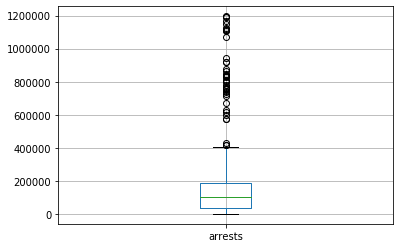

In [11]:
arrest_total_df.boxplot(column=['arrests'])

In [12]:
arrest_year_df = arrest_total_df.groupby(['year']).count().sort_values(['year']) 
arrest_year_df = arrest_year_df.rename(columns={'arrests': 'row_count'})
arrest_year_df

,state,row_count
year,,
2000,48,48
2001,50,50
2002,50,50
2003,50,50
2004,50,50
2005,50,50
2006,50,50
2007,50,50
2008,50,50


## Explore Employment

In [13]:
employment_df = pd.read_csv(EMPLOYMENT_FILE)
employment_df.head()
employment_df.info()

,agency_ct,civilian_ct,year,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,pe_ct_per_1000,population,state_abbr,state_name,total_pe_ct
0,32,675.0,2000,475.0,103.0,578.0,200.0,1055.0,1255.0,2.92,626932,AK,Alaska,1833.0
1,33,661.0,2001,463.0,107.0,570.0,198.0,1097.0,1295.0,2.94,634892,AK,Alaska,1865.0
2,33,701.0,2002,482.0,112.0,594.0,219.0,1091.0,1310.0,2.96,643893,AK,Alaska,1904.0
3,33,682.0,2003,470.0,111.0,581.0,212.0,1063.0,1275.0,2.86,648921,AK,Alaska,1856.0
4,34,688.0,2004,470.0,127.0,597.0,218.0,1125.0,1343.0,2.96,655932,AK,Alaska,1940.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 14 columns):
agency_ct             969 non-null int64
civilian_ct           969 non-null float64
year                  969 non-null int64
female_civilian_ct    969 non-null float64
female_officer_ct     969 non-null float64
female_total_ct       969 non-null float64
male_civilian_ct      969 non-null float64
male_officer_ct       969 non-null float64
male_total_ct         969 non-null float64
pe_ct_per_1000        969 non-null float64
population            969 non-null int64
state_abbr            969 non-null object
state_name            969 non-null object
total_pe_ct           969 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 106.1+ KB


In [14]:
population_df = employment_df[['state_abbr', 'year', 'population']]
population_df.head()

,state_abbr,year,population
0,AK,2000,626932
1,AK,2001,634892
2,AK,2002,643893
3,AK,2003,648921
4,AK,2004,655932


In [15]:
population_df.groupby('year').count()

,state_abbr,population
year,,
2000,51,51
2001,51,51
2002,51,51
2003,51,51
2004,51,51
2005,51,51
2006,51,51
2007,51,51
2008,51,51


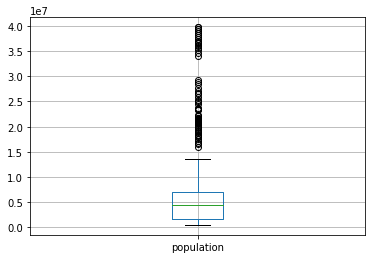

In [16]:
population_df.boxplot(column='population')

## Merge DataFrames

In [24]:
merge_1_df = pd.merge(arrest_total_df, population_df, how='inner', 
                      left_on=['state', 'year'], right_on=['state_abbr', 'year'])
merge_1_df.head()
merge_1_df.shape

,state,year,arrests,state_abbr,population
0,AK,2000,21354,AK,626932
1,AK,2001,20267,AK,634892
2,AK,2002,19818,AK,643893
3,AK,2003,22746,AK,648921
4,AK,2004,21027,AK,655932


(949, 5)

In [18]:
merge_2_df = pd.merge(merge_1_df, state_clean_df, how='inner', left_on=['state'], right_on=['state_abbr'])
merge_2_df.head()

,state,year,arrests,state_abbr_x,population,state_abbr_y,state_name,region_code,region_name
0,AK,2000,21354,AK,626932,AK,Alaska,4,West
1,AK,2001,20267,AK,634892,AK,Alaska,4,West
2,AK,2002,19818,AK,643893,AK,Alaska,4,West
3,AK,2003,22746,AK,648921,AK,Alaska,4,West
4,AK,2004,21027,AK,655932,AK,Alaska,4,West


In [19]:
merge_df = merge_2_df[['region_name', 'state', 'year', 'arrests', 'population']]
merge_df.head()
merge_df.shape

,region_name,state,year,arrests,population
0,West,AK,2000,21354,626932
1,West,AK,2001,20267,634892
2,West,AK,2002,19818,643893
3,West,AK,2003,22746,648921
4,West,AK,2004,21027,655932


(949, 5)

## Analyze & Clean

In [28]:
merge_df['arrest_popu'] = round(merge_df['arrests'] / merge_df['population'], 6)
merge_df.head()
merge_df.info()

/Users/philbert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,region_name,state,year,arrests,population,arrest_popu
0,West,AK,2000,21354,626932,0.034061
1,West,AK,2001,20267,634892,0.031922
2,West,AK,2002,19818,643893,0.030778
3,West,AK,2003,22746,648921,0.035052
4,West,AK,2004,21027,655932,0.032057


<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 948
Data columns (total 6 columns):
region_name    949 non-null object
state          949 non-null object
year           949 non-null int64
arrests        949 non-null int64
population     949 non-null int64
arrest_popu    949 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 51.9+ KB


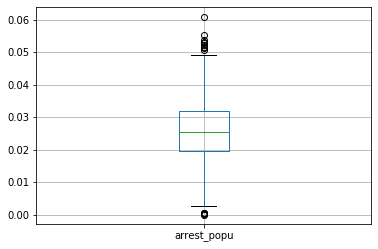

In [29]:
merge_df.boxplot(column=['arrest_popu'])

In [31]:
merge_df.sort_values(['arrest_popu']).head(20)
merge_df.sort_values(['arrest_popu']).tail(20)

,region_name,state,year,arrests,population,arrest_popu
170,South,FL,2017,754,21152963,0.000036
479,West,MT,2004,71,1543792,0.000046
31,South,AL,2012,1597,4834334,0.000330
30,South,AL,2011,1676,4815348,0.000348
32,South,AL,2013,1807,4845981,0.000373
33,South,AL,2014,2480,4861676,0.000510
146,South,DC,2014,1766,658893,0.002680
144,South,DC,2012,1739,632323,0.002750
147,South,DC,2015,1882,672228,0.002800
145,South,DC,2013,1951,646449,0.003018


,region_name,state,year,arrests,population,arrest_popu
932,West,WY,2002,22427,504213,0.044479
741,South,SC,2000,183470,4075438,0.045018
934,West,WY,2004,23367,512254,0.045616
901,Midwest,WI,2009,265352,5792996,0.045806
608,West,NV,2000,91847,2003421,0.045845
776,Midwest,SD,2016,42631,915036,0.046589
935,West,WY,2005,24426,515094,0.047420
930,West,WY,2000,24050,499238,0.048173
931,West,WY,2001,24150,499886,0.048311
936,West,WY,2006,25189,521073,0.048341


In [32]:
# throw out anomalous data

merge_filter_df = merge_df.loc[merge_df['arrest_popu'].between(0.004, 0.05)]
merge_filter_df.shape

(923, 6)

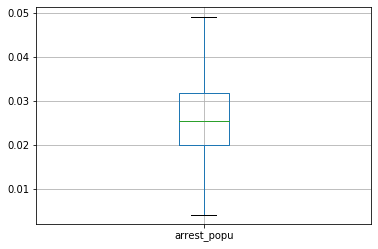

In [33]:
merge_filter_df.boxplot(column=['arrest_popu'])

In [36]:
# not much data was cut out 

merge_filter_df.groupby(['year']).count()[['state']]

,state
year,
2000,47
2001,49
2002,48
2003,49
2004,49
2005,49
2006,49
2007,48
2008,48


## Create Period Dataframes

In [40]:
period_0002_df = merge_filter_df.loc[merge_filter_df['year'].between(2000, 2002)]
period_0002_df.head()
period_0002_df.shape

,region_name,state,year,arrests,population,arrest_popu
0,West,AK,2000,21354,626932,0.034061
1,West,AK,2001,20267,634892,0.031922
2,West,AK,2002,19818,643893,0.030778
19,South,AL,2000,105172,4488050,0.023434
20,South,AL,2001,112383,4502059,0.024963


(144, 6)

In [42]:
period_0810_df = merge_filter_df.loc[merge_filter_df['year'].between(2008, 2010)]
period_0810_df.head()
period_0810_df.shape

,region_name,state,year,arrests,population,arrest_popu
8,West,AK,2008,23074,686732,0.033600
9,West,AK,2009,25193,698901,0.036047
10,West,AK,2010,26013,711456,0.036563
27,South,AL,2008,130248,4684189,0.027806
28,South,AL,2009,118120,4732747,0.024958


(148, 6)

In [44]:
period_1618_df = merge_filter_df.loc[merge_filter_df['year'].between(2016, 2018)]
period_1618_df.head()
period_1618_df.shape

,region_name,state,year,arrests,population,arrest_popu
16,West,AK,2016,18123,747188,0.024255
17,West,AK,2017,18421,744849,0.024731
18,West,AK,2018,19551,742552,0.026329
35,South,AL,2016,88350,4885591,0.018084
36,South,AL,2017,77342,4894285,0.015803


(146, 6)

In [45]:
# examine number of counts per region

period_0002_df.groupby(['region_name']).count()[['state', 'year']]
period_0810_df.groupby(['region_name']).count()[['state', 'year']]
period_1618_df.groupby(['region_name']).count()[['state', 'year']]

,state,year
region_name,,
Midwest,34,34
Northeast,27,27
South,44,44
West,39,39


,state,year
region_name,,
Midwest,35,35
Northeast,27,27
South,48,48
West,38,38


,state,year
region_name,,
Midwest,35,35
Northeast,27,27
South,45,45
West,39,39


NormaltestResult(statistic=5.275835285246796, pvalue=0.07151002404870511)

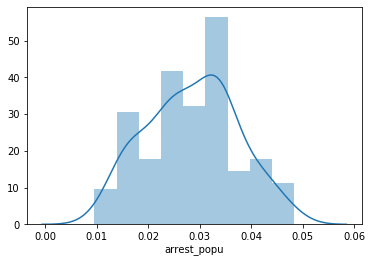

In [55]:
arrest_0002_sr = period_0002_df['arrest_popu']
stats.normaltest(arrest_0002_sr)
sns.distplot(arrest_0002_sr)

NormaltestResult(statistic=4.689703244913513, pvalue=0.09586142475801074)

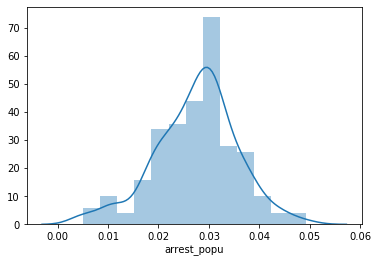

In [56]:
arrest_0810_sr = period_0810_df['arrest_popu']
stats.normaltest(arrest_0810_sr)
sns.distplot(arrest_0810_sr)

NormaltestResult(statistic=6.245563232114495, pvalue=0.04403451080325922)

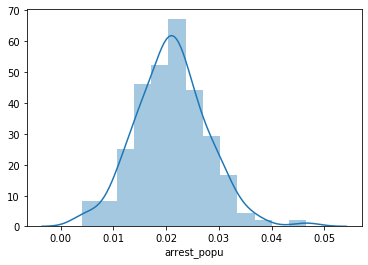

In [57]:
arrest_1618_sr = period_1618_df['arrest_popu']
stats.normaltest(arrest_1618_sr)
sns.distplot(arrest_1618_sr)

In [60]:
round(arrest_0002_sr.mean(), 6)
round(arrest_0810_sr.mean(), 6)
round(arrest_1618_sr.mean(), 6)

0.028531

0.027477

0.021018

In [ ]:
save_path = r'data/crime_data_full.csv'
merge_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'